<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01104776/blob/main/Copia3_Actividad_Semanal_6_visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Actividad Semanal -- 6 Visualización**

**Andrea Margarita Osorio González** 


**A01104776**

**Ciencia y Analítica de datos**


**Orlando Figón Cruz**


**01/11/2022**

**Data Set Information:**

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.


**Attribute Information:**

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

**X1:** Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

**X2:** Gender (1 = male; 2 = female). 

**X3:** Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

**X4:** Marital status (1 = married; 2 = single; 3 = others). 
**X5:** Age (year). 

**X6** - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 

**X12-X17:** Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 

**X18-X23:** Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 


Relevant Papers:

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.



Citation Request:

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [3]:
mypath="https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

In [4]:
df  = pd.DataFrame
df

pandas.core.frame.DataFrame

In [5]:
df=pd.read_csv(mypath)

In [6]:
data = pd.read_csv(mypath, sep=",", header='infer')

print(data.shape)
data.head()

(30000, 25)


,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [7]:
df.columns


Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [8]:
df.shape

(30000, 25)

In [9]:
cat_columns = ['ID', 'X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'Y']
for i in cat_columns:
    df[i] = df[i].astype('category')
df.dtypes

ID     category
X1        int64
X2     category
X3     category
X4     category
X5      float64
X6     category
X7     category
X8     category
X9     category
X10    category
X11    category
X12     float64
X13     float64
X14     float64
X15     float64
X16     float64
X17     float64
X18     float64
X19     float64
X20     float64
X21     float64
X22     float64
X23     float64
Y      category
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   ID      30000 non-null  category
 1   X1      30000 non-null  int64   
 2   X2      29999 non-null  category
 3   X3      29998 non-null  category
 4   X4      29998 non-null  category
 5   X5      29995 non-null  float64 
 6   X6      29997 non-null  category
 7   X7      29995 non-null  category
 8   X8      29993 non-null  category
 9   X9      29991 non-null  category
 10  X10     29984 non-null  category
 11  X11     29986 non-null  category
 12  X12     29989 non-null  float64 
 13  X13     29989 non-null  float64 
 14  X14     29987 non-null  float64 
 15  X15     29985 non-null  float64 
 16  X16     29983 non-null  float64 
 17  X17     29990 non-null  float64 
 18  X18     29992 non-null  float64 
 19  X19     29991 non-null  float64 
 20  X20     29992 non-null  float64 
 21  X21     2998

In [11]:
df.isnull().values.any()

True

In [12]:
df.isnull().any()

ID     False
X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

In [13]:
df.isna().any()

ID     False
X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

In [14]:
df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [15]:
df.isna().sum()

ID      0
X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64

In [16]:
df.drop('ID', axis=1, inplace=True)
df.dropna(inplace=True)



In [17]:
df.corr()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
X1,1.000000,0.144515,0.285616,0.278435,0.283373,0.294090,0.295625,0.290517,0.195026,0.178320,0.210052,0.203187,0.216990,0.219567
X5,0.144515,1.000000,0.056357,0.054469,0.053911,0.051528,0.049515,0.047810,0.025995,0.021820,0.029262,0.021338,0.022811,0.019533
X12,0.285616,0.056357,1.000000,0.951494,0.892272,0.860273,0.829781,0.802638,0.140276,0.099301,0.156856,0.158260,0.167010,0.179287
X13,0.278435,0.054469,0.951494,1.000000,0.928306,0.892456,0.859756,0.831570,0.280323,0.100770,0.150631,0.147338,0.157848,0.174180
X14,0.283373,0.053911,0.892272,0.928306,1.000000,0.923953,0.883893,0.853302,0.244291,0.316904,0.129933,0.143343,0.179617,0.182257
X15,0.294090,0.051528,0.860273,0.892456,0.923953,1.000000,0.940133,0.900931,0.232916,0.207498,0.299953,0.130124,0.160283,0.177562
X16,0.295625,0.049515,0.829781,0.859756,0.883893,0.940133,1.000000,0.946187,0.216967,0.181177,0.252229,0.293084,0.141421,0.164102
X17,0.290517,0.047810,0.802638,0.831570,0.853302,0.900931,0.946187,1.000000,0.199966,0.172615,0.233710,0.250218,0.307691,0.115415
X18,0.195026,0.025995,0.140276,0.280323,0.244291,0.232916,0.216967,0.199966,1.000000,0.285522,0.252063,0.199491,0.148102,0.185659
X19,0.178320,0.021820,0.099301,0.100770,0.316904,0.207498,0.181177,0.172615,0.285522,1.000000,0.244709,0.180043,0.180800,0.157563


In [18]:
df.describe()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,35.483443,51248.119901,49200.493825,4.703239e+04,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025
std,129737.299088,9.214319,73674.949943,71211.232744,6.938524e+04,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3559.250000,2984.000000,2.664750e+03,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000
50%,140000.000000,34.000000,22379.000000,21194.500000,2.008550e+04,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67190.000000,64027.750000,6.018300e+04,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


In [19]:
df.value_counts()

X1       X2   X3   X4   X5    X6    X7    X8    X9    X10   X11   X12       X13       X14       X15       X16        X17        X18      X19      X20       X21      X22      X23      Y  
100000   2.0  2.0  1.0  49.0  1.0   -2.0  -2.0  -2.0  -2.0  -2.0  0.0       0.0       0.0       0.0        0.0        0.0       0.0      0.0      0.0       0.0      0.0      0.0      0.0    2
200000   2.0  1.0  1.0  34.0  1.0   -2.0  -2.0  -2.0  -2.0  -2.0  0.0       0.0       0.0       0.0        0.0        0.0       0.0      0.0      0.0       0.0      0.0      0.0      0.0    2
360000   2.0  1.0  2.0  27.0  1.0   -2.0  -2.0  -2.0  -2.0  -2.0  0.0       0.0       0.0       0.0        0.0        0.0       0.0      0.0      0.0       0.0      0.0      0.0      0.0    2
160000   1.0  2.0  2.0  28.0  -2.0  -2.0  -2.0  -2.0  -2.0  -2.0  0.0       0.0       0.0       0.0        0.0        0.0       0.0      0.0      0.0       0.0      0.0      0.0      0.0    2
210000   2.0  1.0  2.0  39.0  1.0   -2.0  -2.

In [20]:
df.dtypes

X1        int64
X2     category
X3     category
X4     category
X5      float64
X6     category
X7     category
X8     category
X9     category
X10    category
X11    category
X12     float64
X13     float64
X14     float64
X15     float64
X16     float64
X17     float64
X18     float64
X19     float64
X20     float64
X21     float64
X22     float64
X23     float64
Y      category
dtype: object

In [21]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [22]:
df["X1"]=df["X1"]/df["X1"].max()

In [23]:
df["X15"]=df["X15"]/df["X15"].max()

In [24]:
df["X16"]=df["X16"]/df["X16"].max()

In [25]:
df[["X1","X15","X16"]].head()

,X1,X15,X16
0,0.02,0.000000,0.000000
1,0.12,0.003670,0.003726
2,0.09,0.016074,0.016122
3,0.05,0.031757,0.031234
4,0.05,0.023486,0.020650


In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
num_cols = [v for v in df.columns.values.tolist()if v not in cat_columns]
print(num_cols)
df = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols)
df.head()

['X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']


,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,-1.137363,-1.246282,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,-0.366561,-1.029224,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,-0.597802,-0.160996,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,-0.906122,0.164590,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,-0.906122,2.335161,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314


In [28]:
def getVarianceInfo(data: pd.DataFrame):
    totalVariance = data.var().sum()
    print('Total variance {0}'.format(totalVariance))
    sum_variance = 0
    var, sum_var = list(), list()
    for i in data.columns.values.tolist():
        variance = data[i].var()/totalVariance
        sum_variance += variance
        print(f'Varianza {i}: {((variance)*100).round(2)}%, total: {round(sum_variance*100, 2)}%')
        var.append(((variance)*100).round(2))
        sum_var.append(round(sum_variance*100, 2))
    return var, sum_var

In [29]:
v, f = getVarianceInfo(df)

Total variance 14.000467336515669
Varianza X1: 7.14%, total: 7.14%
Varianza X5: 7.14%, total: 14.29%
Varianza X12: 7.14%, total: 21.43%
Varianza X13: 7.14%, total: 28.57%
Varianza X14: 7.14%, total: 35.71%
Varianza X15: 7.14%, total: 42.86%
Varianza X16: 7.14%, total: 50.0%
Varianza X17: 7.14%, total: 57.14%
Varianza X18: 7.14%, total: 64.29%
Varianza X19: 7.14%, total: 71.43%
Varianza X20: 7.14%, total: 78.57%
Varianza X21: 7.14%, total: 85.71%
Varianza X22: 7.14%, total: 92.86%
Varianza X23: 7.14%, total: 100.0%


In [30]:
print(df.iloc[:,:10].idxmax().sort_values())

X1      2182
X12     2182
X13     2182
X15     2182
X16     2182
X17     2182
X14     5281
X19     5281
X5     18216
X18    28681
dtype: int64


In [31]:
print(df.iloc[:,:10].idxmin().sort_values())

X18        0
X19        8
X1        40
X17      275
X5       514
X15     3168
X12    12304
X14    18086
X13    21700
X16    23297
dtype: int64


In [32]:
pcs = PCA()
components = pcs.fit_transform(df)
components.shape

(29958, 14)

In [33]:
import seaborn as sns

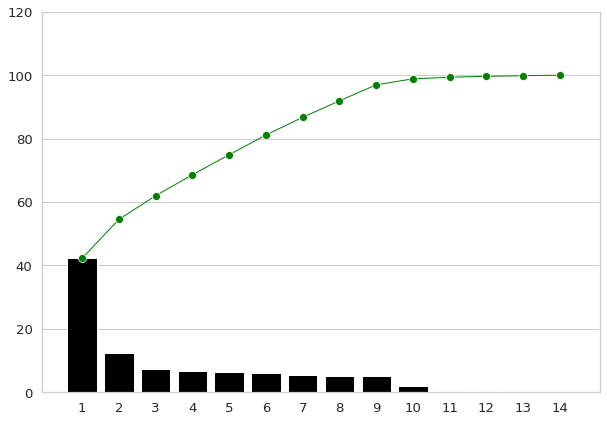

In [34]:
PC_comp = np.arange(pcs.n_components_) + 1

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_comp, 
                y = pcs.explained_variance_ratio_*100, 
                color = 'black'
                )

_ = sns.lineplot(x = PC_comp-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_)*100, 
                 color = 'green', 
               
                 linewidth = 1, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.ylim(0, 120)
plt.show()

Con esta gráfica podemos visualizar en dónde se centra la información de datos y cuáles son menos "relevantes"

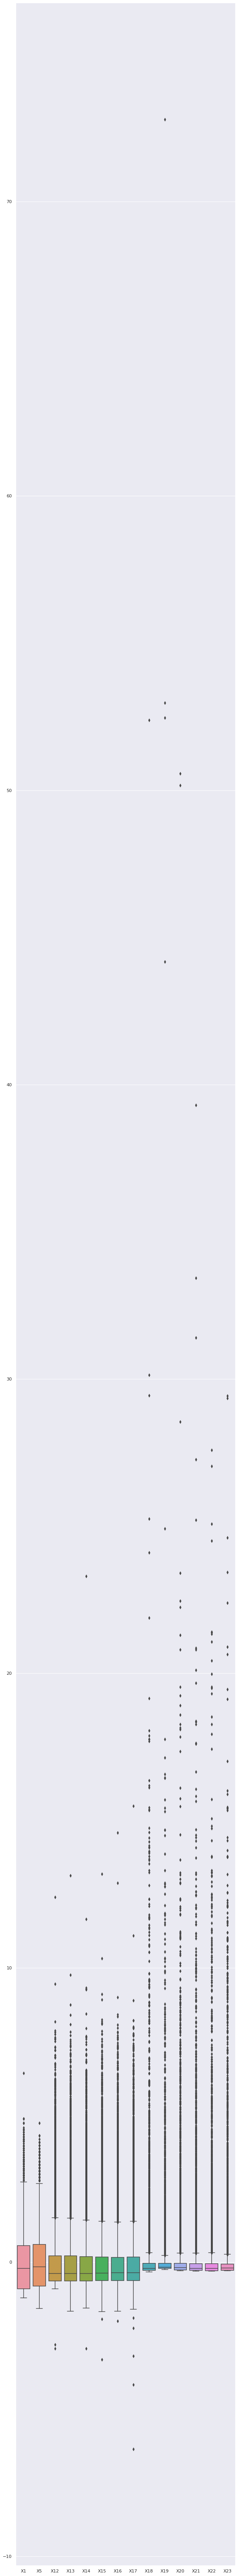

In [35]:
sns.set(rc = {'figure.figsize':(10,120)})
sns.boxplot( data=df)

Utilizamos boxplot para visualizar los valores atípicos y comparar distribuciones y detectar los valores de acuerdo al cuartil en que se encuentren los datos.

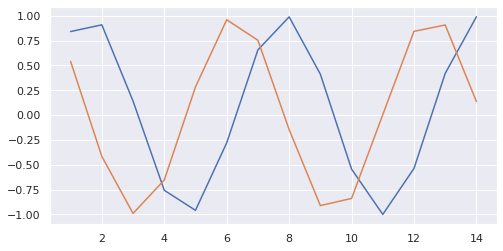

In [49]:
plt.plot(PC_comp, np.sin(PC_comp))
plt.plot(PC_comp, np.cos(PC_comp));

Utilizamos esta gráfica para detectar en dónde se encuentran los picos y cómo se va desenvolviendo el comportamiento de datos 